Ссылка на курс: https://www.youtube.com/playlist?list=PLCf-cQCe1FRxW2QMJbWBl4SSkVAPhId_e
# Симуляции случайных величин

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

## Генерация СВ

In [3]:
# задаем генератор нормального распределения
norm_gen = stats.norm(loc=0, scale=1)

У генератора есть методы:
- rvs - генерация выборки размером n (size=n)
- cdf - значение функции распределения (cumulative distribution function)  в точке
- pdf - значение плотности распределения  (probability density function) в точке
- ppf - квантиль

In [4]:
# генерируем 100 наблюдений
sample = norm_gen.rvs(size=100)

In [5]:
sample[:10]

array([-0.34432724, -0.44083066, -1.05597698,  0.42752435,  0.20675068,
       -0.81113323, -0.46882863, -1.22488725, -0.66645954,  0.36707817])

## Плотность и функция распределения

In [6]:
# плотность - f(1)
norm_gen.pdf(1)

0.24197072451914337

Построим плотность распределения с помощью генератора нормального распределения

In [7]:
x = np.linspace(1, 100, 100) # зададим решетку для примера
x[:5]

array([1., 2., 3., 4., 5.])

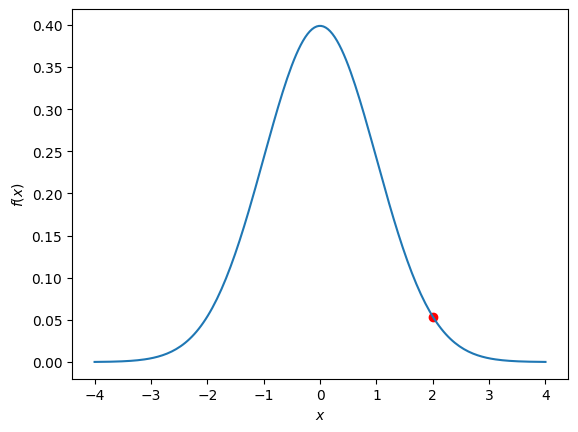

In [8]:
x = np.linspace(-4, 4, 200) # задали массив
pdf = norm_gen.pdf(x) # посчитаем плотность для каждого элемента массива

# рисуем
plt.plot(x, pdf) # зададим оси
plt.xlabel('$x$') # $ - для формул
plt.ylabel('$f(x)$') # $ - для формул

# нарисуем точку на графике (в списках можно указать несколько точек)
plt.scatter([2], [norm_gen.pdf(2)], color='red') # задаем x, y

Чтобы посчитать вероятность, что x <= 2 и обозначить на графике плотности, удобнее найти значение функции распределения вероятности в этой точке

In [9]:
# ищем значение в точке 2
norm_gen.cdf(2)

0.9772498680518208

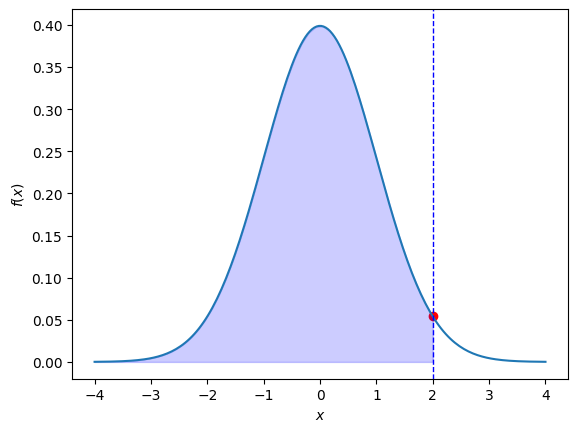

In [10]:
# дублируем график выше
x = np.linspace(-4, 4, 200)
pdf = norm_gen.pdf(x)

plt.plot(x, pdf)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.scatter([2], [norm_gen.pdf(2)], color='red') # задаем x, y

# ищем значения плотности до нужного значения
xq = np.linspace(-4, 2) # последний параметр по умолчанию 50
yq = norm_gen.pdf(xq)

# штрихуем: 0...yq - диапазон штриховки от 0 до значений плотности
plt.fill_between(xq, #  xq - диапазон
                 0, # нижняя граница штриховки
                 yq, # верхняя граница штрховки
                 color='blue',
                 alpha=0.2) # alpha - прозрачность

# штриховая линия
plt.axvline(2, color='blue', linestyle='--', lw=1)

Посмтроим график функции распределения

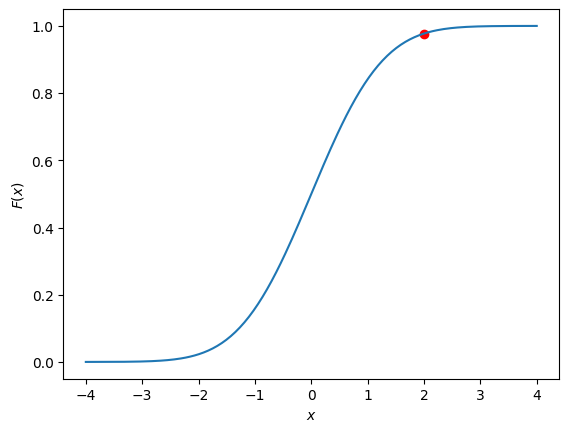

In [11]:
x = np.linspace(-4, 4, 200)
cdf = norm_gen.cdf(x)

plt.plot(x, cdf)
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.scatter([2], [norm_gen.cdf(2)], color='red')

Найдем вероятность P(1 < X < 3) = интеграл от 1 до 3 f(x) = F(3) - F(1)

In [12]:
norm_gen.cdf(3) - norm_gen.cdf(1)

0.15730535589982697

Изобразим на плотности вероятность выше

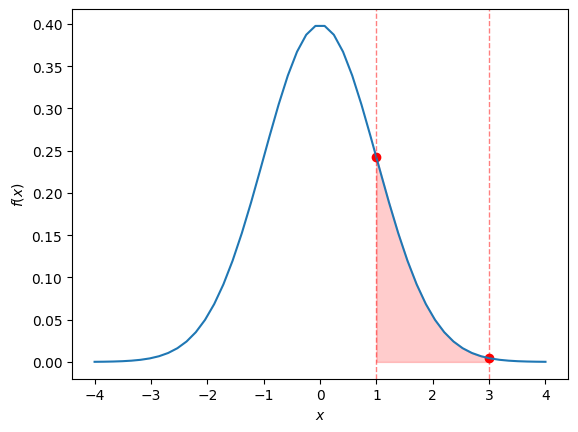

In [13]:
x = np.linspace(-4, 4)
y = norm_gen.pdf(x)
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

# добавим точки
plt.scatter([1, 3], [norm_gen.pdf(1), norm_gen.pdf(3)], color='red')

# вычисляем значения плотности между точками и добавляем штриховку
xq = np.linspace(1, 3)
yq = norm_gen.pdf(xq)
plt.fill_between(xq, 0, yq, color='red', alpha=0.2)

# линии
plt.axvline(1, color='r', linestyle='--', lw=1, alpha=0.5)
plt.axvline(3, color='r', linestyle='--', lw=1, alpha=0.5)

## Квантиль
Квантиль уровня x - число, левее которого значение СВ попадает с вероятностью x. Например, значение квантиля, левее которого лежит 5% всех возможных значений СВ (т.е. вероятность попадания левее от x с вероятностью 0.05, пятый перцентиль) равно -1.64

In [14]:
q = norm_gen.ppf(0.05)
q

-1.6448536269514729

Text(-1.5448536269514728, 0.25049760038007973, '-1.64')

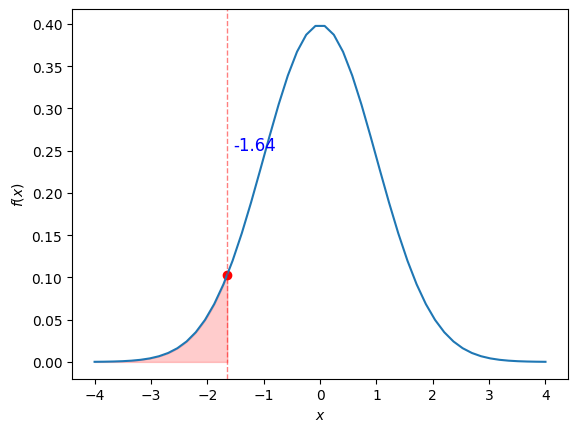

In [15]:
# изобразим на плотности это число и заштрихуем вероятность
x = np.linspace(-4, 4)
y = norm_gen.pdf(x)
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

# добавим точку
plt.scatter(q, norm_gen.pdf(q), color='red')

# вычисляем значения плотности между точками и добавляем штриховку
xq = np.linspace(-4, q)
yq = norm_gen.pdf(xq)
plt.fill_between(xq, 0, yq, color='red', alpha=0.2)

# линии
plt.axvline(q, color='r', linestyle='--', lw=1, alpha=0.5)

# ищем максимум по оси y
y_max = plt.ylim()[1]

# надпись
plt.text(q+0.1, # координата надписи по оси x
         y_max*0.6, # координата надписи по оси y
         round(q, 2), # сама запись
         color='blue',
         fontsize=12) # размер надписи

## Эмпирическое распределение
Обычно неизвестно, из какого распределения выборка. Посчитаем по ней статистики

In [16]:
# размерность вектора
sample.shape

(100,)

In [17]:
# выборочное среднее
np.mean(sample)

-0.06717808124909594

In [18]:
# выборочна дисперсия
np.var(sample)

0.8033467037137406

In [19]:
np.var(sample, ddof=1)

0.8114613168825663

In [20]:
np.median(sample)

0.021528163423982206

Построим гистограмму - эмпирическую оценку плотности распределения

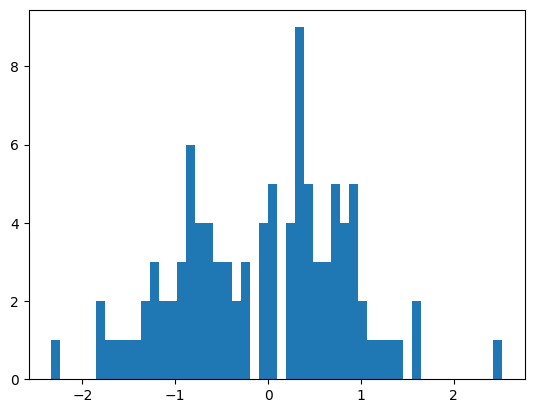

In [21]:
# ';' скрывает вывод массива над графиком и прочую хрень
plt.hist(sample, bins=50);

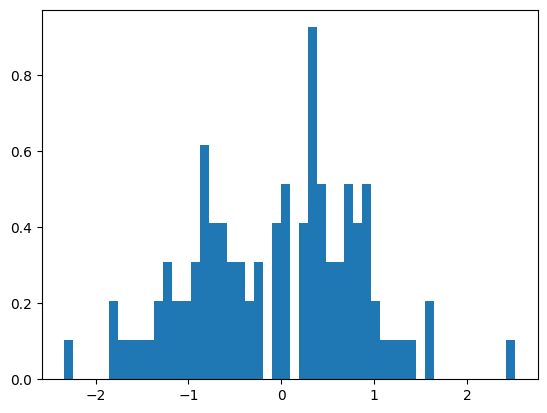

In [22]:
# график можно отнормировать
plt.hist(sample, bins=50, density=True);

Text(0, 0.5, '$f(x)$')

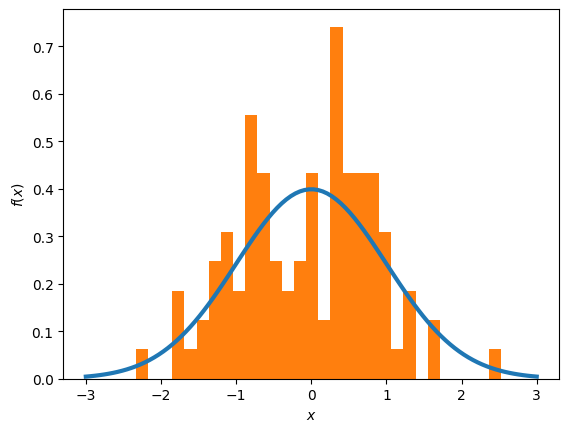

In [23]:
x = np.linspace(-3, 3, 100) # задаем массив точек, по которым строится график
pdf = norm_gen.pdf(x)

# плотность
plt.plot(x, pdf,
         lw=3) # ширина линии

# гистограмма выше
plt.hist(sample, bins=30, density=True)

plt.xlabel('$x$')
plt.ylabel('$f(x)$')

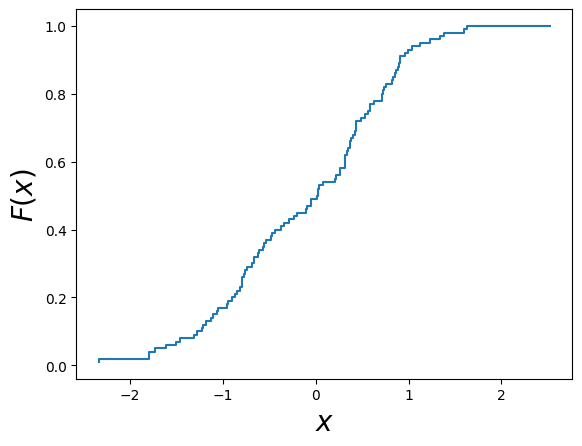

In [24]:
# строим эмпирическую функцию распределения (empirical cumulative distribution function)
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)

plt.step(ecdf.x, ecdf.y) # кусочно-линейная

plt.xlabel('$x$', fontsize=20) # размер шрифта x
plt.ylabel('$F(x)$', fontsize=20);

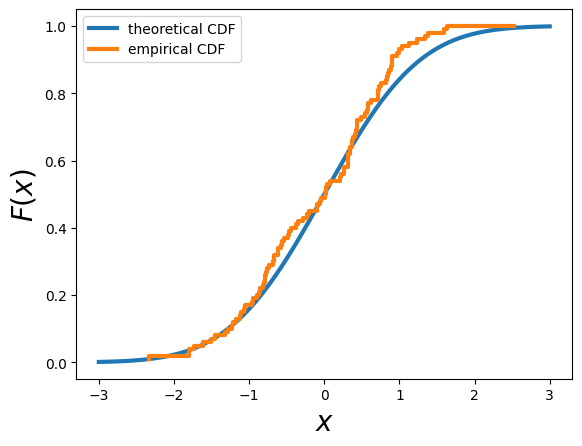

In [25]:
# сравним с теоретической F(x)
x = np.linspace(-3, 3, 100) # задаем массив точек, по которым строится график
cdf = norm_gen.cdf(x)
plt.plot(x, cdf, lw=3, label='theoretical CDF')
ecdf = ECDF(sample)

plt.step(ecdf.x, ecdf.y, lw=3, label='empirical CDF')

plt.xlabel('$x$', fontsize=20)
plt.ylabel('$F(x)$', fontsize=20)
plt.legend(loc='upper left');

## Генерация выборок
Создадим выборку без повторений из вектра 1:10, которая состоит из 5 элементов. Сдедать это можно так же через `np.random`

In [28]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [27]:
np.random.choice(np.arange(1, 11), 
                 size=5,
                 replace=False)

array([9, 5, 1, 7, 2])

Расставим сомостоятельно вероятность событий:

In [29]:
# вызовем помощь, посмотрим параметры функции
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the `~numpy.random.Generator.choice`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning th

In [30]:
# симулятор рыбалки
np.random.choice(['карась', 'щука', 'плотва'], 
                 size=5,
                 p=[0.5, 0.3, 0.2])

array(['карась', 'плотва', 'карась', 'карась', 'плотва'], dtype='<U6')

## Зерна
Зерна (`random_seed, random_state`) нужны для того, чтобы получать одинаковые симуляции СВ при перезапуске программы (или при работе на нескольких компьютерах)

In [31]:
stats.norm(loc=3, scale=2).rvs(5)

array([2.88290728, 0.34404709, 3.44625837, 4.38183935, 1.58607061])

In [32]:
stats.norm(loc=3, scale=2).rvs(5)

array([0.8100422 , 0.48860427, 3.22898365, 5.46044537, 6.62167993])

In [33]:
stats.norm(loc=3, scale=2).rvs(5, random_state=42)

array([3.99342831, 2.7234714 , 4.29537708, 6.04605971, 2.53169325])

In [34]:
stats.norm(loc=3, scale=2).rvs(5, random_state=42)

array([3.99342831, 2.7234714 , 4.29537708, 6.04605971, 2.53169325])